# Tensorflow

One of the biggest advantages of the scripting language Python is the strong support of the big companies with libraries for deep learning. Tensorflow is the deep learning package from the company Google. Other examples are PyTorch from the company Facebook.

In the following, the library Tensorflow is explained by sample code for image classification taken from:

https://www.tensorflow.org/tutorials/keras/classification

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print('installed version of Tensorflow: ', tf.__version__)

installed version of Tensorflow:  2.14.0


## Supervised Learning
In a supervised learning scenario, the neural network should learn the target behaviour by labelled data. In the given example of image classification, a training sample consists of a single image (e.g. a boot) and the corresponding label ('boot' encoded by an integer corresponding to the class name).

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('the first training sample image has the index ', train_labels[0])
print('the first training sample image has the label ', class_names[train_labels[0]])

the first training sample image has the index  9
the first training sample image has the label  Ankle boot


The first training image is (obviously) a boot:

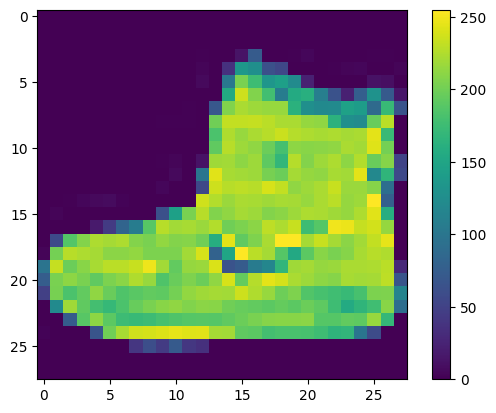

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Training data and test data
The supervised training may lead to overfitting, if the trained neural network is specializing to the training data and not generalizing to unknown inputs. This kind of specialization to the training data is called overfitting.

In order to detect overfitting, the samples are divided into two sets: training data and test data. The neural network is trained on the training data. In a second step, the training progress is observed on the test data. The training process is valid, if the classification performance on the test data is comparable to the classification performance on the training data.

In [5]:
print('number of training samples: ', train_labels.shape[0])
print('number of test samples: ', test_labels.shape[0])

number of training samples:  60000
number of test samples:  10000


## Normalization
Neural networks usually perform better, if the input data is normalized to zero mean and unit variance.

Another mode of normalization is shown here: The input data is normalized to the interval $0..1$.

Normalization is equivalent to automatic gain control.

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Knowing your data
If data is used for supervised training, it is very important to take an insight in the given data in order to be sure, that the data is labelled correctly.

This checking of data should be based on a random indexing in order to be sure, that all the data is labelled correct.

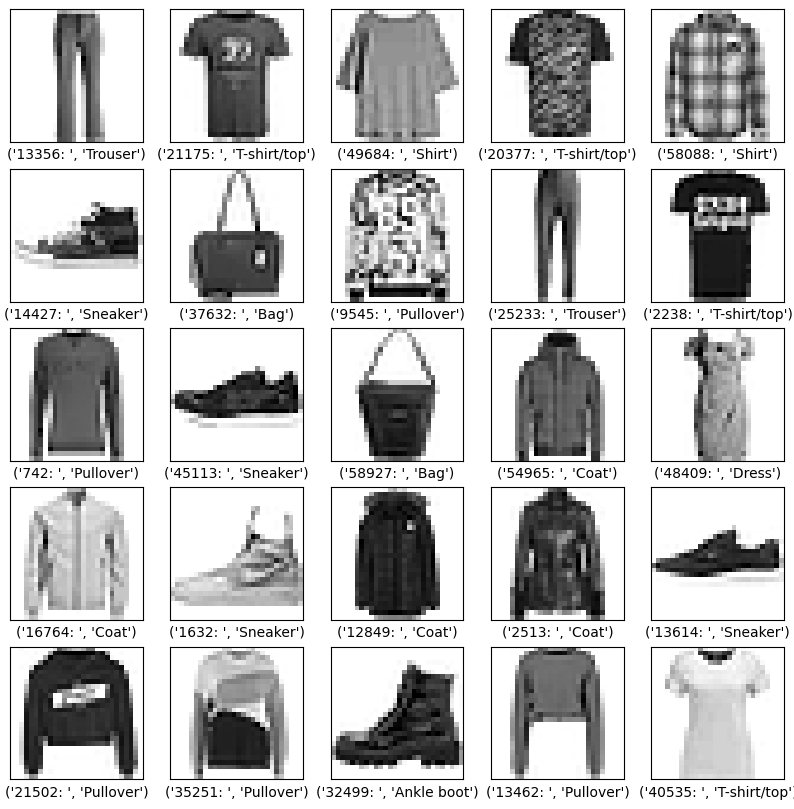

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    ImageIndex = int(np.random.randint(train_images.shape[0]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[ImageIndex], cmap=plt.cm.binary)
    xlabel = str(ImageIndex) + ': ', class_names[train_labels[ImageIndex]]
    plt.xlabel(xlabel)
plt.show()

## Defining the tensorflow model
In the following a very simple neural network is defined:
A sequential model is also called feedforward network in the literature.
The flatten-layer converts the input image into a vector.
The dense layers are fully connected layers.
The final layer in a classification network should have the same number of output neurons as classes exists, here: 10.

Finally, the model need to be compiled before the training process can start.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Training
The training is performed on the training data for a given number of epochs.

Afterwards, the training success is evaluated on the test data.

The test accuracy should be comparable to the training accuracy. Otherwise, overfitting may have occured.

In [9]:
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5098 - accuracy: 0.8218
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3998 - accuracy: 0.8557
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3709 - accuracy: 0.8653
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3456 - accuracy: 0.8745
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3327 - accuracy: 0.8784
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3203 - accuracy: 0.8835
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3110 - accuracy: 0.8863
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3016 - accuracy: 0.8890
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2904 - accuracy: 0.8928
Epoch 10/10
1875/1875 [==============================] - 23s 12m

## Prediction
In order to predict unknown data with the trained model, the procedure predict must be called.
If you want to have the information, how reliable the prediction process is, you can interprete the output of a softmax layer. If the final layer of the trained model is not a softmax layer, a softmax layer can be appended.

The outputs of a softmax layer add up to a sum of one.
Therefore, the output can be interpreted as a probability density function.

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
ProbabilityOfPredictions = probability_model.predict(test_images)

RandomIndex = int(np.random.randint(test_images.shape[0]))
PredictedClassIndex = np.argmax(ProbabilityOfPredictions[RandomIndex])
print('prediction image number ', RandomIndex)
print('the image contains a ', class_names[test_labels[RandomIndex]])
print('the network predicts a ', class_names[PredictedClassIndex])
print('the probability of this prediction is ', str(ProbabilityOfPredictions[RandomIndex, PredictedClassIndex]))

313/313 [==============================] - 3s 8ms/step
prediction image number  8691
the image contains a  Bag
the network predicts a  Bag
the probability of this prediction is  0.9989485


## Programming exercise
Evaluate the confusion matrix for the test data.

In [16]:
def EvaluateConfusionMatrix():
    ConfusionMatrix = np.zeros((len(class_names), len(class_names)))
    # solution begins

    # solution ends
    return ConfusionMatrix

ConfusionMatrix = EvaluateConfusionMatrix()
print(ConfusionMatrix)

import unittest

class TestProgrammingExercise(unittest.TestCase):

    def test_1(self):
        ConfusionMatrix = EvaluateConfusionMatrix()
        idx1 = np.random.randint(len(class_names))
        idx2 = np.random.randint(len(class_names))
        tmp_labels = np.copy(test_labels)
        tmp_labels[test_labels == idx1] = idx2
        tmp_labels[test_labels == idx2] = idx1
        test_loss, test_acc = model.evaluate(test_images,  tmp_labels, verbose=2)
        acc = 0.0
        for n in range(ConfusionMatrix.shape[0]):
            if n == idx1:
                acc += ConfusionMatrix[idx1, idx2]
            elif n == idx2:
                acc += ConfusionMatrix[idx2, idx1]
            else:
                acc += ConfusionMatrix[n, n]
        acc /= np.sum(ConfusionMatrix)
        self.assertAlmostEqual(acc, test_acc, delta = 1e-5)

    def test_2(self):
        ConfusionMatrix = EvaluateConfusionMatrix()
        for n in range(1, ConfusionMatrix.shape[0]):
            self.assertEqual(np.sum(ConfusionMatrix[n, :]), np.sum(ConfusionMatrix[0, :]))

    def test_3(self):
        ConfusionMatrix = EvaluateConfusionMatrix()
        acc = 0.0
        for n in range(ConfusionMatrix.shape[0]):
            acc += ConfusionMatrix[n, n]
        acc /= np.sum(ConfusionMatrix)
        self.assertAlmostEqual(acc, test_acc, delta = 1e-5)

unittest.main(argv=[''], verbosity=2, exit=False)

test_1 (__main__.TestProgrammingExercise.test_1) ... 

[[899.   2.   8.  16.   1.   0.  69.   1.   4.   0.]
 [  5. 965.   0.  23.   4.   0.   2.   0.   1.   0.]
 [ 37.   1. 813.  14.  65.   0.  68.   1.   1.   0.]
 [ 40.   5.   7. 885.  30.   0.  32.   0.   1.   0.]
 [  1.   0. 145.  33. 724.   0.  97.   0.   0.   0.]
 [  0.   0.   0.   1.   0. 928.   0.  48.   1.  22.]
 [187.   1.  88.  26.  48.   0. 644.   0.   5.   1.]
 [  0.   0.   0.   0.   0.   6.   0. 975.   0.  19.]
 [  9.   0.   9.   8.   4.   8.  15.  12. 935.   0.]
 [  0.   0.   0.   0.   0.   5.   1.  47.   0. 947.]]
313/313 - 1s - loss: 1.7192 - accuracy: 0.6987 - 1s/epoch - 5ms/step


ok
test_2 (__main__.TestProgrammingExercise.test_2) ... ok
test_3 (__main__.TestProgrammingExercise.test_3) ... ok

----------------------------------------------------------------------
Ran 3 tests in 2.499s

OK


## Exam preparation
1) Name the reasons for separating the available data in training data and test data.
2) Name the accuracy of the simplest possible classification algorithm if this used data set is perfectly balanced.